<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week4_Resample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Bootstrapping

We have seen that when we have $N$ IID draws of $X$, we can estimate $\mu_X$ via

$\bar{X} = \frac{1}{N}\sum_{k=1}^N X_k$

The Variance of this estimator is given by 
$$\mathrm{Var}(\bar{X}) = \frac{1}{N}\sigma_X^2$$

If $X$ is normal, we also know that

$$Z = \frac{\bar{X}- \mu_X}{\frac{\sigma_X}{\sqrt{N}}}$$ 
is distributed $Z \sim \mathcal{N}(0,1)$


Since we don't typically know $\sigma_X$, we instead use 
$$s_X = \frac{1}{N-1}\sum_{k =1}^N (X_k - \bar{X})^2$$

and we know that

$$T  = \frac{\bar{X}- \mu_X}{\frac{s_X}{\sqrt{N}}}$$ 
is distributed $T \sim \mathcal{T}(\nu = N-1)$

Note that for $\nu \geq 30$, the $T$ distribution is essentially $\mathcal{N}(0,1)$




## CLT

However, it is often the case that $X$ is not normal. But the Central Limit Theorem tells us that for "large" N, $T \sim \mathcal{T}(\nu = N-1)$ (approximately).  

From this observation, we can construct an $\alpha$ confidence intervals for $\mu_X$ as

$$\bar{X} \pm t_{\frac{\alpha}{2}}\frac{s_X}{\sqrt{N}}$$

Where $F(t_{\frac{\alpha}{2}}; \nu=N-1) = 1-\alpha$ and $F$ is the CDF of the T distribution.


This is commonly used in practice.  But as noted previously, the CLT doesn't tell us whether $N$ is large enough that this approximation is any good.  

## Bootstrapping

With advent of modern computers, bootstrapping (or resampling) is a practical technique to overcome this limitation of the previous method which relies on the CLT.

The idea is that, we use the sample we have *as if* it were the entire population. We then estimate properties of the estimator by resampling from that population.

What are we interested in knowing?  Two properties are the bias and the standard deviation.  

Suppose that the sample is drawn from a distribution dependent on a parameter vector $\theta$.  Suppose we have an estimator $t(\{X_i\}_{i=1..N})$ for $\theta$





### Bias

The bias of the estimator is given by

$$\mathrm{Bias}(t) = \mathrm{E}(t(\{X_i\}_{i=1..N}) - \theta$$

Ideally, an estimator will have a bias close to zero.

### Standard Deviation

The standard deviation is the square root of the variance which is simply

$$\mathrm{Var}(t) = \mathrm{E}\left(t(\{X_i\}_{i=1..N})-\mathrm{E}(t(\{X_i\}_{i=1..N})^2 \right) $$


Ideally, this will be a small number.


Bootstrapping gives us a way to estimate bias anad standard deviation using the sample that we have.



#### Example
We start by generating a fake date set of $100$ draws from the gamma distribution with $\alpha = 1$ and $\beta  =2$.

We then calculate $\bar{X}$. 

When we bootstrap, we will redraw from our sample *with replacement* $B$ times where $B$ is some presuptively large value.  Each time, we sample $100$ draws (same as the original sample size).  The difference is that because we are drawing with replacement, not all of our samples will be identical.  This can give us insight into the behavior of $\bar{X}$ if we calculate the sample mean for every resample.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [ ]:
data = ss.gamma.rvs(size = 100, a =1, scale =2, random_state = 5222)

Xbar = data.mean()


print("The mean of our sample is ", Xbar)

The mean of our sample is  2.1548217317339184


For the bootstrapping, we will do it rather manually with a loop (to illustrate).  We take $B = 500$ and use numpy.random's choice function.

In [ ]:
B = 500

xbars = np.zeros(B)

for s in range(B):
  sample = np.random.choice(data, size = len(data), replace = True)
  xbars[s]= sample.mean()





Now let's take a look at the distribution of the sampled mean estimates. We will estimatee bias by comparing the mean of the sample with the average resampled mean.  We estimat the standard deviation from the standard deviation of our resampling.

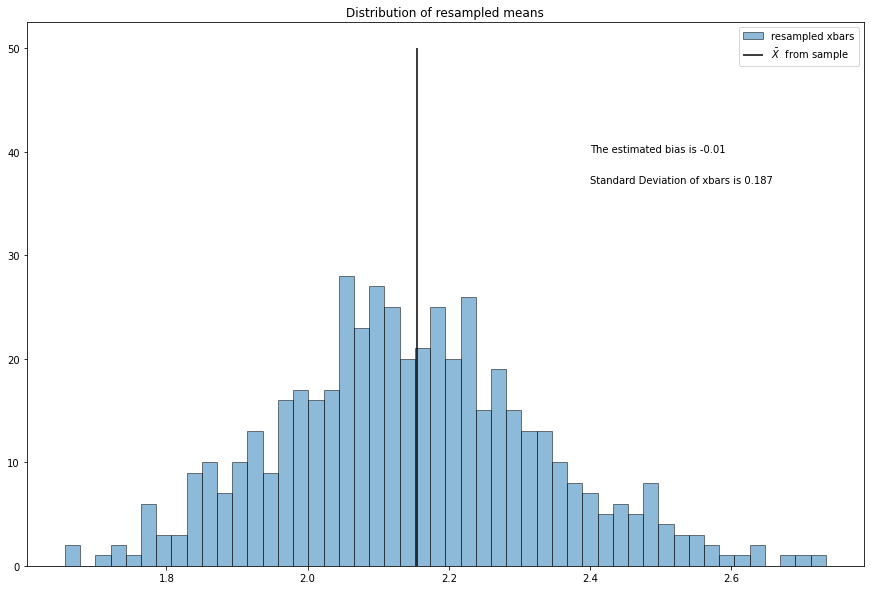

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(xbars, bins = 50, edgecolor = "black", alpha = .5, label = "resampled xbars")

plt.vlines(Xbar, 0, 50, label ="$\\bar{X}$  from sample")

plt.legend()


plt.text(2.4, 40, "The estimated bias is "+str(np.round(xbars.mean() - Xbar,3)))

plt.text(2.4, 37, "Standard Deviation of xbars is "+str(np.round(xbars.std(),3)))

plt.title("Distribution of resampled means")

plt.show()

This tells us two things (subjectively).

1. This estimator has a standard deviation of about 0.2
2. The estimator has small bias.


Now, just to verify that what the bootstrap is telling is trustworthy, let's actually sample from the underlying distribution 1000 times and calculate those sample means and see if things look consistent.

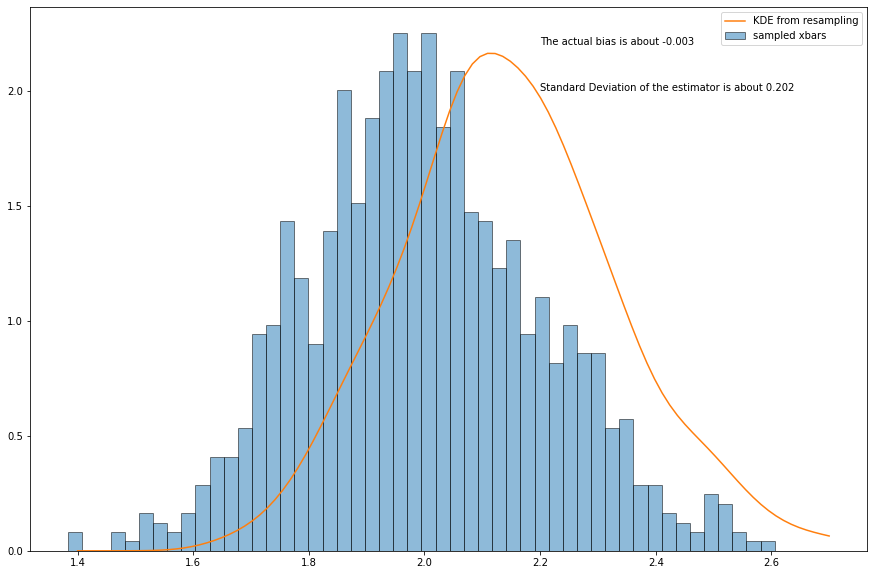

In [ ]:
M = 1000
Xbars = np.zeros(M)

x = np.linspace(1.4,2.7,100)

for i in range(M):
  datai = ss.gamma.rvs(size = 100, a =1, scale =2)
  Xbars[i] = datai.mean()


plt.figure(figsize = (15,10))

plt.hist(Xbars, bins = 50, edgecolor = "black", alpha = .5,density = True, label = "sampled xbars")

plt.plot(x, ss.gaussian_kde(xbars)(x), label= "KDE from resampling")

plt.text(2.2, 2.2, "The actual bias is about "+str(np.round(Xbars.mean() - 2,3)))

plt.text(2.2, 2, "Standard Deviation of the estimator is about "+str(np.round(Xbars.std(),3)))


plt.legend()

plt.show()




It appears that our "conclusions" were pretty decent.  Yes, the orignal sample wass off center, but within the error range we expect. And the shape is basically correct.


#### Example 2

We will use the same distribution as before, but we will now estimate the shape parameter $\alpha$.  We will then use bootstrapping to better understand our estimator of $\alpha$.

For the gamma distribution, we know that $\mu_X = \alpha \beta$ and $\sigma_X^2 = \alpha \beta^2$. 

So we can estimate $\hat{\alpha} = \frac{\bar{X}^2}{s^2}$

This is a momement matching approach (not MLE).





In [ ]:
alphahat = data.mean()**2/data.var(ddof=1)
alphahat

1.1312662565677856

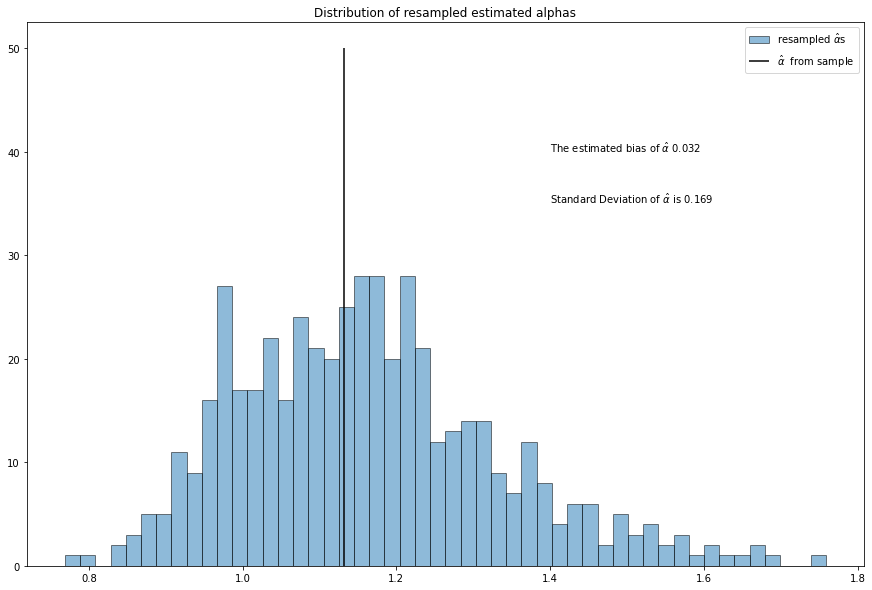

In [ ]:
B = 500

alphahats = np.zeros(B)

for s in range(B):
  sample = np.random.choice(data, size = len(data), replace = True)
  alphahats[s]= sample.mean()**2/sample.var(ddof=1)



plt.figure(figsize = (15,10))

plt.hist(alphahats, bins = 50, edgecolor = "black", alpha = .5, label = "resampled $\\hat{\\alpha}$s")

plt.vlines(alphahat, 0, 50, label ="$\\hat{\\alpha}$  from sample")

plt.legend()

plt.text(1.4, 35, "Standard Deviation of $\\hat{\\alpha}$ is "+str(np.round(alphahats.std(),3)))
plt.text(1.4, 40, "The estimated bias of $\\hat{\\alpha}$ "+str(np.round(alphahats.mean() - alphahat,3)))

plt.title("Distribution of resampled estimated alphas")

plt.show()



We see that the dispersion of the estimates shows a great deal of right skew.  We also see that the bias does not appear to be too bad.  Let's check like we did before.

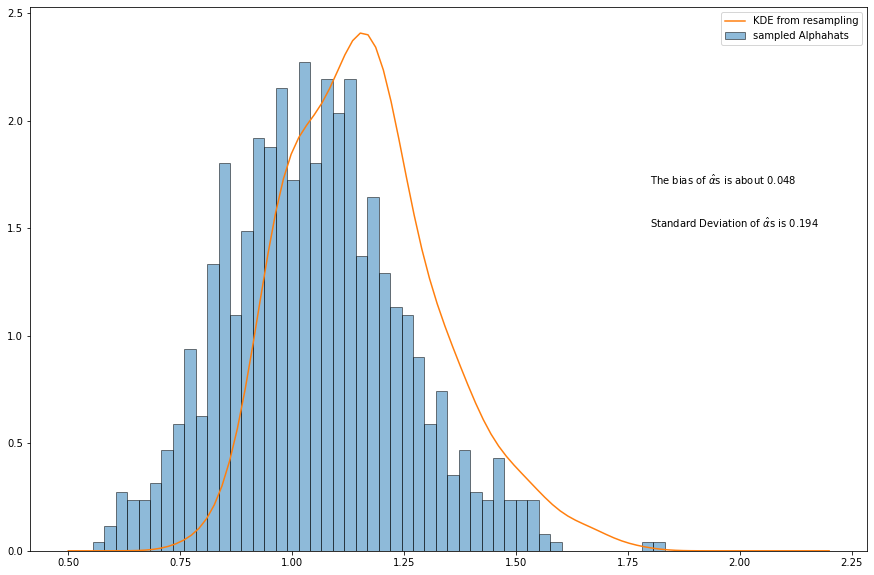

In [ ]:
M = 1000
Alphahats = np.zeros(M)

x = np.linspace(0.5,2.2,100)

for i in range(M):
  datai = ss.gamma.rvs(size = 100, a =1, scale =2)
  Alphahats[i] = datai.mean()**2/datai.var(ddof=1)


plt.figure(figsize = (15,10))

plt.hist(Alphahats, bins = 50, edgecolor = "black", alpha = .5,density = True, label = "sampled Alphahats")

plt.plot(x, ss.gaussian_kde(alphahats)(x), label= "KDE from resampling")

plt.text(1.8, 1.5, "Standard Deviation of $\\hat{\\alpha}$s is "+str(np.round(Alphahats.std(),3)))
plt.text(1.8, 1.7, "The bias of $\\hat{\\alpha}$s is about "+str(np.round(Alphahats.mean() - 1,3)))


plt.legend()

plt.show()

Note that the resmpling also shows us that this estimator exhibits skew.